## Analyze A/B Test Results
by Gerrit Tombrink


This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these. 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [45]:
# Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [46]:
# Implement dataset
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [47]:
# Find the number of rows
total = df.shape[0]
print('The dataset consists of {} rows.'.format(total))

The dataset consists of 294478 rows.


c. The number of unique users in the dataset.

In [48]:
# Find unique users
unique_users = df.user_id.nunique()
print('The dataset includes {} unique users.'.format(unique_users))

The dataset includes 290584 unique users.


d. The proportion of users converted.

In [49]:
# Calculate the proportion of users
values = df[df['converted'] == 1]
values_counts = values["converted"].count()
values_total = df['converted'].count()
proportion = ((values_counts / values_total) * 100).round()
print('The proportion of users converted is {}%.'.format(proportion))

The proportion of users converted is 12.0%.


e. The number of times the `new_page` and `treatment` don't line up.

In [50]:
# Find the number of times of two variables do not line up
group1 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'old_page'))]
group2 = df[((df['group'] == 'control') & (df['landing_page'] == 'new_page'))]
print('"new_page" and "treatment" do not line up {} times.'.format(len(group1 + group2)))

"new_page" and "treatment" do not line up 3893 times.


f. Do any of the rows have missing values?

In [51]:
# Find missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [52]:
print("No rows have missing values.")

No rows have missing values.


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [53]:
# Create new dataset
df.drop(df.query("group == 'treatment' & landing_page == 'old_page'").index, inplace=True)
df.drop(df.query("group == 'control' & landing_page == 'new_page'").index, inplace=True)
df2 = df

In [54]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [55]:
# Check the dataset a second time
df2.shape

(290585, 5)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [56]:
# Find unique users
unique = df2.user_id.nunique()
print("{} unique 'user_id' could be found in the dataset 'df2'.".format(unique))

290584 unique 'user_id' could be found in the dataset 'df2'.


b. There is one **user_id** repeated in **df2**.  What is it?

In [57]:
# Find duplicates
repeated = df2[df2.user_id.duplicated()]
print("The repeated 'user_id' in df2 is:\n {}".format(repeated))

The repeated 'user_id' in df2 is:
       user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 

In [58]:
# Find informations about duplicates
row_inf = df2[df2.duplicated(["user_id"], keep=False)]
print("The row information for the repeated 'user_id' is:\n {}".format(row_inf))

The row information for the repeated 'user_id' is:
       user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [59]:
# Remove duplicates
df2.drop([1899], inplace=True)

In [60]:
# Check dataset with one removed row
df2.shape

(290584, 5)

In [61]:
# Check dataset with one removed row
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [62]:
# Calculate probability
probability = df2["converted"].mean()
print("The probability is {}.".format(probability))

The probability is 0.11959708724499628.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [63]:
# Calculate probability of converted in control
prob_group = df2.query("group == 'control'")["converted"].mean()
print("In the 'control' group the probability they converted is {}.".format(prob_group))

In the 'control' group the probability they converted is 0.1203863045004612.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [64]:
# Calculate probability of converted in treatment
prob_group2 = df2.query("group == 'treatment'")["converted"].mean()
print("In the 'treatment' group the probability they converted is {}.".format(prob_group2))

In the 'treatment' group the probability they converted is 0.11880806551510564.


d. What is the probability that an individual received the new page?

In [65]:
# Count user_id of new_page
prob_group3 = df2.query("landing_page == 'new_page'")["user_id"].count()

# Calculate probability
prob = prob_group3 / df2.shape[0]

print("The probability that an individual received the new page is {}.".format(prob))

The probability that an individual received the new page is 0.5000619442226688.


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**This analysis shows that the probability of an individual converted is in the 'control' group 0.1203863045004612 and in the 'treatment' group 0.11880806551510564. Additionally, we find out that the probability of an individual received the new page is 0.5000619442226688. The conversion to the old and new page is more or less the same. Influencing factors such as time span of a visit are not included in this analysis - for further analysis, they should be recorded and implemented.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new}​≤ p_{old}​$$
$$H_1: p_{new}​> p_{old}​$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [66]:
# Calculate the mean
P_new = df2.converted.mean()
print("The convert rate for p-new under the null is {}.".format(P_new))

The convert rate for p-new under the null is 0.11959708724499628.


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [67]:
# Calculate the mean
P_old = df2.converted.mean()
print("The convert rate for p-old under the null is {}.".format(P_old))

The convert rate for p-old under the null is 0.11959708724499628.


c. What is $n_{new}$?

In [68]:
# Count the new pages
N_new = df2.query("landing_page == 'new_page'")["user_id"].count()
print("The dataset consists of {} new pages.".format(N_new))

The dataset consists of 145310 new pages.


d. What is $n_{old}$?

In [69]:
# Count the old pages
N_old = df2.query("landing_page == 'old_page'")["user_id"].count()
print("The dataset consists of {} old pages.".format(N_old))

The dataset consists of 145274 old pages.


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [70]:
# Simulate binomial of Nnew
new_page_converted = np.random.binomial(N_new, P_new)
new_page_converted

17470

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [71]:
# Simulate binomial of Nold
old_page_converted = np.random.binomial(N_old, P_old)
old_page_converted

17115

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [72]:
# Calculate the difference 
p_diff = (new_page_converted/N_new) - (old_page_converted/N_old)
print("The p-difference for the simulated values is: {}".format(p_diff))

The p-difference for the simulated values is: 0.0024138653435901297


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [73]:
# Bootstrapping the simulation 10,000 times and store the results in p_diffs
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(N_new, P_new)
    old_page_converted = np.random.binomial(N_old, P_old)
    p_diffs.append((new_page_converted/N_new) - (old_page_converted/N_old))

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

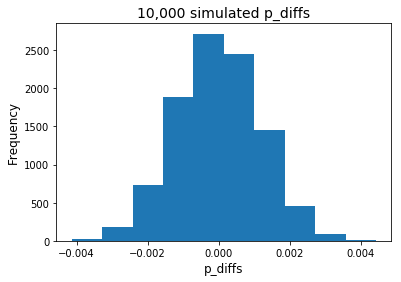

In [74]:
# Plot a histogram
plt.hist(p_diffs);
plt.ylabel('Frequency', fontsize=12);
plt.xlabel('p_diffs', fontsize=12);
plt.title('10,000 simulated p_diffs', fontsize=14);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [75]:
# Calculate the proportion
actual_diff = df[df['group'] == 'treatment']['converted'].mean() - df[df['group'] == 'control']['converted'].mean()

In [76]:
# Calculate the difference
difference = (actual_diff < p_diffs).mean()
perc = difference * 100
print("{}% are greater than the actual difference.".format(perc))

90.8% are greater than the actual difference.


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In this analysis, we compute the p-value. Because the p-value is large we have to choose the null hypothesis (H0) as true. Consequently, we fail to reject the null hypothesis. It means that there is no benefit of choosing the new page because the value of the new page is not higher than the old page. **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [77]:
# Calculate the number of conversions
convert_old = df2.query("group == 'control'")['converted'].sum()
convert_new = df2.query("group == 'treatment'")['converted'].sum()
n_old = df2.query("group == 'control'")['converted'].count()
n_new = df2.query("group == 'treatment'")['converted'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [78]:
# Import library
import statsmodels.api as sm

# Compute test statistic and p-value, see: http://knowledgetack.com/python/statsmodels/proportions_ztest/
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = "smaller")

print("The computed z-score is: {} and the p-value is: {}".format(z_score, p_value))

The computed z-score is: 1.3109241984234394 and the p-value is: 0.9050583127590245


In [79]:
# Import library
from scipy.stats import norm

# Tells us how significant our z-score is; see: http://knowledgetack.com/python/statsmodels/proportions_ztest/
print("The significance of our z-score is: {}".format(norm.cdf(z_score)))

# Tells us what our critical value at 95% confidence is; see: http://knowledgetack.com/python/statsmodels/proportions_ztest/
print("Our critical value at 95% confidence is: {}".format(norm.ppf(1-(0.05))))

The significance of our z-score is: 0.9050583127590245
Our critical value at 95% confidence is: 1.6448536269514722


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Because the z-score of 1.31092419842 is less than our critical value of 1.6448536269514722 we accept the null hypothesis. Consequently, there is no benefit to prefer the new page. This calculation agrees with the findings in parts j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression should be used.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [80]:
# Add intercept column
df2['intercept'] = 1

# Implement dummy variable and columns
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

# Check implementation
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [81]:
# Import library
import statsmodels.api as sm

# Implement and fit logistic regression model
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'treatment']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [82]:
# Print the results of statsmodels
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 May 2018   Pseudo R-squ.:               8.077e-06
Time:                        13:01:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**With this regression model, our null and alternative hypotheses are as follow:**

$$H_0: p_{new} = p_{old}​$$
$$H_1: p_{new}  \neq p_{old}​$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**For our analysis, we have to think about the Simpson's paradox (see: https://en.wikipedia.org/wiki/Simpson%27s_paradox). Consequently, we should investigate discriminating factors of the dataset through deeper analysis of several different groups or through the combination of data-groups.
Furthermore, we could implement other factors in our regression model such as time span of a visit, new and returning visitor, personal and academic background. But we should consider that the implementation of other factors could break the regression model.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [83]:
# Import csv file
df_countries = pd.read_csv("countries.csv")

# Merge datasets with an inner join
df3 = df_countries.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')

# Check dataset
df3.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [84]:
# Count values of new dataset
df3['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [85]:
# Implement dummy variable and columns
df3[['CA', 'US']] = pd.get_dummies(df3['country'])[['CA', 'US']]

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [86]:
# Import library
import statsmodels.api as sm

# Add intercept column
df3['intercept'] = 1

# Implement and fit regression model
log = sm.Logit(df3['converted'], df3[['intercept', 'US', 'CA']])
results = log.fit()

# Print the results of statsmodels
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 May 2018   Pseudo R-squ.:               1.521e-05
Time:                        13:01:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
==============================================================================
"""

In [87]:
# Exponentiate results
np.exp(results.params)

intercept    0.137132
US           0.990133
CA           0.950546
dtype: float64

**Even with this regression model, we could not find any significant difference between the dummy variables. The high p-values of the countries illustrate that they are not statistically significant. As a result of this analysis, we must accept the null hypothesis (H0) and reject the alternative hypothesis (H1).**

<a id='conclusions'></a>
## Conclusion

This analysis of the dataset has shown that there is no benefit of choosing the new page. Consequently, we must accept the null hypothesis (H0) and reject the alternative hypothesis (H1). Practically, I would suggest to invest in the content of the old website and its media effectiveness to increase the flow of visitors. After a period of time, such as half a year, it makes sense to check the flow of visitors to the website again.

In [88]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0